In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from gensim.models.keyedvectors import KeyedVectors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from scipy.stats import zscore
from matplotlib.pyplot import figure

### import the save embeddings using word2vec 12 vectors

In [2]:
# import the stock2vec model 
binary_vectors = 'embeddings/stoack2vec_Keyed_Binary_new.bin'
text_vectors = 'embeddings/stoack2vec_Keyed_Text_new.vec'

model = KeyedVectors.load_word2vec_format(text_vectors, binary=False)
word_dict = {}
embeddings = []
symbols = []
for word in model.key_to_index:
    word_dict[word] = model[word]
    #embeddings.append(model2[word])

for key in word_dict:
    embeddings.append(word_dict[key])
#embeddings
len(word_dict)

505

In [3]:
word_dict

{'AMP': array([-1.9482595 ,  4.312803  , -1.3124228 , -0.36815587,  2.5034716 ,
        -5.8376775 ,  1.0206567 , -0.34640446,  2.4505513 ,  6.1549935 ,
         2.2047565 ,  3.5851324 ], dtype=float32),
 'BLL': array([-0.35545182,  0.17940763,  0.13844495, -0.49704012, -2.0773263 ,
         1.4144781 , -0.34559277, -0.48572674,  2.3801913 , -1.6848506 ,
         0.81861675, -0.6173399 ], dtype=float32),
 'PLD': array([ 2.962415  ,  3.6648555 ,  6.1183157 ,  1.3210795 ,  1.6674551 ,
         0.11246467,  0.8615402 ,  2.4542687 ,  2.9270105 , -3.4283032 ,
         1.9672122 , -8.764344  ], dtype=float32),
 'CMCSA': array([ 0.15729658,  0.47663352, -1.193297  , -1.4721768 , -2.2748945 ,
        -1.5935569 , -0.8964768 ,  0.02963242, -0.13925217,  0.05990377,
         0.01326433,  0.22570468], dtype=float32),
 'CVS': array([ 0.11029503,  0.81338817,  0.23996739, -1.2337973 , -4.4515758 ,
        -0.1224476 ,  1.4001504 ,  1.2829499 , -1.7456707 , -2.820261  ,
         0.41259375, -1.02321

In [4]:
# put the embeddings into the csv files
# rename the column name into 'Symbol' for the merge in the next step
model_vectors = pd.DataFrame.from_dict(word_dict, orient='index').reset_index()
model_vectors = model_vectors.rename({'index': 'Ticker'}, axis=1)
model_vectors.head()

,Ticker,0,1,2,3,4,5,6,7,8,9,10,11
0,AMP,-1.948259,4.312803,-1.312423,-0.368156,2.503472,-5.837677,1.020657,-0.346404,2.450551,6.154994,2.204756,3.585132
1,BLL,-0.355452,0.179408,0.138445,-0.497040,-2.077326,1.414478,-0.345593,-0.485727,2.380191,-1.684851,0.818617,-0.617340
2,PLD,2.962415,3.664855,6.118316,1.321079,1.667455,0.112465,0.861540,2.454269,2.927011,-3.428303,1.967212,-8.764344
3,CMCSA,0.157297,0.476634,-1.193297,-1.472177,-2.274894,-1.593557,-0.896477,0.029632,-0.139252,0.059904,0.013264,0.225705
4,CVS,0.110295,0.813388,0.239967,-1.233797,-4.451576,-0.122448,1.400150,1.282950,-1.745671,-2.820261,0.412594,-1.023219


### import the embeddings using fasttext 10 vectors

In [5]:
# import the stock2vec model 
binary_vectors_fasttext = 'embeddings/stoack2vec_Keyed_Binary_fasttext.bin'
text_vectors_fasttext = 'embeddings/stoack2vec_Keyed_Text_fasttext.vec'

model_ft = KeyedVectors.load_word2vec_format(text_vectors, binary=False)
word_dict_ft = {}
embeddings_ft = []
symbols_ft = []
for word in model_ft.key_to_index:
    word_dict_ft[word] = model_ft[word]
    #embeddings.append(model2[word])

for key in word_dict_ft:
    embeddings_ft.append(word_dict_ft[key])
#embeddings
len(word_dict_ft)

505

In [6]:
word_dict_ft

{'AMP': array([-1.9482595 ,  4.312803  , -1.3124228 , -0.36815587,  2.5034716 ,
        -5.8376775 ,  1.0206567 , -0.34640446,  2.4505513 ,  6.1549935 ,
         2.2047565 ,  3.5851324 ], dtype=float32),
 'BLL': array([-0.35545182,  0.17940763,  0.13844495, -0.49704012, -2.0773263 ,
         1.4144781 , -0.34559277, -0.48572674,  2.3801913 , -1.6848506 ,
         0.81861675, -0.6173399 ], dtype=float32),
 'PLD': array([ 2.962415  ,  3.6648555 ,  6.1183157 ,  1.3210795 ,  1.6674551 ,
         0.11246467,  0.8615402 ,  2.4542687 ,  2.9270105 , -3.4283032 ,
         1.9672122 , -8.764344  ], dtype=float32),
 'CMCSA': array([ 0.15729658,  0.47663352, -1.193297  , -1.4721768 , -2.2748945 ,
        -1.5935569 , -0.8964768 ,  0.02963242, -0.13925217,  0.05990377,
         0.01326433,  0.22570468], dtype=float32),
 'CVS': array([ 0.11029503,  0.81338817,  0.23996739, -1.2337973 , -4.4515758 ,
        -0.1224476 ,  1.4001504 ,  1.2829499 , -1.7456707 , -2.820261  ,
         0.41259375, -1.02321

In [7]:
# put the embeddings into the csv files
# rename the column name into 'Symbol' for the merge in the next step
model_vectors_ft = pd.DataFrame.from_dict(word_dict_ft, orient='index').reset_index()
model_vectors_ft = model_vectors_ft.rename({'index': 'Ticker'}, axis=1)
model_vectors_ft.head()

,Ticker,0,1,2,3,4,5,6,7,8,9,10,11
0,AMP,-1.948259,4.312803,-1.312423,-0.368156,2.503472,-5.837677,1.020657,-0.346404,2.450551,6.154994,2.204756,3.585132
1,BLL,-0.355452,0.179408,0.138445,-0.497040,-2.077326,1.414478,-0.345593,-0.485727,2.380191,-1.684851,0.818617,-0.617340
2,PLD,2.962415,3.664855,6.118316,1.321079,1.667455,0.112465,0.861540,2.454269,2.927011,-3.428303,1.967212,-8.764344
3,CMCSA,0.157297,0.476634,-1.193297,-1.472177,-2.274894,-1.593557,-0.896477,0.029632,-0.139252,0.059904,0.013264,0.225705
4,CVS,0.110295,0.813388,0.239967,-1.233797,-4.451576,-0.122448,1.400150,1.282950,-1.745671,-2.820261,0.412594,-1.023219


### import the SP_COMANY csv file

In [8]:
# import the file you want to predict 
# numbers of employees here
sp_company = pd.read_csv('data/SP500_employees.csv')
sp_company = sp_company.rename({'Market Cap ($B)': 'Market_Cap', 
                                'PE Ratio (TTM)': 'PE_Ratio', 
                                '# Employees': 'Employees_numbers'}, axis=1)
sp_company.head()

,S&P 500 Companies,Ticker,Sector,Market_Cap,PE_Ratio,# Employees,SEC filings
0,Walmart,WMT,Retail Trade,407.63,22.9,2200000.0,reports
1,Amazon.com Inc.,AMZN,Retail Trade,1605.05,122.1,798000.0,reports
2,Accenture plc,ACN,Technology Services,151.35,28.9,506000.0,reports
3,United Parcel Service,UPS,Transportation,148.41,34.4,495000.0,reports
4,Kroger Co.,KR,Retail Trade,25.37,9.9,435000.0,reports


In [9]:
# because '# Employees' seems cannot be recognised, that we use this way to edit the column name
sp_company.rename(columns={sp_company.columns[-2]: 'Employees_numbers'},inplace=True)

In [10]:
# check if any NaN values in the data
null_counts = sp_company.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

# drop the rows with nan values 
sp_company = sp_company.dropna()

### import the prevoius embeddings which is 4 vectors

In [11]:
# import the previous file with 4 vectors
sp_company_previous = pd.read_csv('data/employee_data.csv')
sp_company_previous.head()

,company,symbol,sector,market_cap,pe_ratio,number_of_employees,sec_filing,vector1,vector2,vector3,vector4
0,Walmart,WMT,Retail Trade,407.63,22.9,2200000.0,reports,0.829953,-1.023615,-0.031209,-1.269893
1,Amazon.com Inc.,AMZN,Retail Trade,1605.05,122.1,798000.0,reports,0.091421,-1.058599,-0.839604,0.834054
2,Accenture plc,ACN,Technology Services,151.35,28.9,506000.0,reports,0.228507,-0.474911,-0.782801,-2.162982
3,United Parcel Service,UPS,Transportation,148.41,34.4,495000.0,reports,0.212781,-0.739657,-0.670442,-2.129345
4,Kroger Co.,KR,Retail Trade,25.37,9.9,435000.0,reports,0.849830,-0.377965,-0.452920,0.417005


In [12]:
# zscore transformation 
# sp_company file
numeric_cols = sp_company.select_dtypes(include=[np.number]).columns
sp_company[numeric_cols] = sp_company[numeric_cols].apply(zscore)

# sp_company_previous file
selected_cols = ['market_cap', 'pe_ratio', 'number_of_employees']
sp_company_previous[selected_cols] = sp_company_previous[selected_cols].apply(zscore)
sp_company_previous.head()

,company,symbol,sector,market_cap,pe_ratio,number_of_employees,sec_filing,vector1,vector2,vector3,vector4
0,Walmart,WMT,Retail Trade,1.737196,-0.200754,14.823641,reports,0.829953,-1.023615,-0.031209,-1.269893
1,Amazon.com Inc.,AMZN,Retail Trade,8.035564,0.696255,5.104183,reports,0.091421,-1.058599,-0.839604,0.834054
2,Accenture plc,ACN,Technology Services,0.389176,-0.146500,3.079873,reports,0.228507,-0.474911,-0.782801,-2.162982
3,United Parcel Service,UPS,Transportation,0.373712,-0.096766,3.003615,reports,0.212781,-0.739657,-0.670442,-2.129345
4,Kroger Co.,KR,Retail Trade,-0.273472,-0.318306,2.587661,reports,0.849830,-0.377965,-0.452920,0.417005


In [13]:
# merge two dataframe using the symbol column
# embeddings with 12 vectors
sp_company_2vec = pd.merge(sp_company, model_vectors, on='Ticker')

# embeddings with 4 vectors
sp_company_previous

# embeddings with fasttext
sp_company_ft = pd.merge(sp_company, model_vectors_ft, on='Ticker')

### Compare the original SP_Company dataset and SP_Company with vectors to see if any prediction improvement

In [14]:
# split the predictors and target in three datasets

# the orginal one
X_original = sp_company[['PE_Ratio', 'Employees_numbers']]
Y_original = sp_company[['Market_Cap']]

# the sp_company file with 12 dimensions
X_2vec = sp_company_2vec.drop(['S&P 500 Companies', 'Ticker', 'Sector', 'Market_Cap', 'SEC filings'], axis=1)
Y_2vec = sp_company_2vec[['Market_Cap']]

# the sp_company file with 4 dimensions
X_previous = sp_company_previous.drop(['company', 'symbol', 'sector', 'market_cap', 'sec_filing'], axis=1)
Y_previous = sp_company_previous[['market_cap']]

# the sp_company file with fasttext
X_ft = sp_company_ft.drop(['S&P 500 Companies', 'Ticker', 'Sector', 'Market_Cap', 'SEC filings'], axis=1)
Y_ft = sp_company_ft[['Market_Cap']]

In [15]:
# held out cross validation for three datasets

# the orginal one
X_original_train, X_original_test, Y_original_train, Y_original_test = train_test_split(X_original, Y_original, test_size=0.2, random_state=10)

# the sp_company file with 12 dimensions
X_2vec_train, X_2vec_test, Y_2vec_train, Y_2vec_test = train_test_split(X_2vec, Y_2vec, test_size=0.2, random_state=10)

# the sp_company file with 4 dimensions
X_previous_train, X_previous_test, Y_previous_train, Y_previous_test = train_test_split(X_previous, Y_previous, test_size=0.2, random_state=10)

# the sp_company file with fasttext
X_ft_train, X_ft_test, Y_ft_train, Y_ft_test = train_test_split(X_ft, Y_ft, test_size=0.2, random_state=10)

In [16]:
model_LR = LinearRegression()

# the orginal one
LR_original = model_LR.fit(X_original_train, Y_original_train)
predictions_lr = LR_original.predict(X_original_test)
print('r2 score:', r2_score(Y_original_test, predictions_lr))

# the sp_company file with 12 dimensions
LR_2vec = model_LR.fit(X_2vec_train, Y_2vec_train)
predictions_lr_2vec = LR_2vec.predict(X_2vec_test)
print('r2 score:', r2_score(Y_2vec_test, predictions_lr_2vec))

# the sp_company file with 4 dimensions
LR_previous = model_LR.fit(X_previous_train, Y_previous_train)
predictions_lr_previous = LR_previous.predict(X_previous_test)
print('r2 score:', r2_score(Y_previous_test, predictions_lr_previous))

# the sp_company file with fasttext
LR_ft = model_LR.fit(X_ft_train, Y_ft_train)
predictions_lr_ft = LR_ft.predict(X_ft_test)
print('r2 score:', r2_score(Y_ft_test, predictions_lr_ft))

r2 score: 0.08480584142856273
r2 score: 0.32855197949593207
r2 score: 0.2131242573533213
r2 score: 0.32855197949593207


C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [17]:
model_gb = GradientBoostingRegressor()

# the orginal one
GB_original = model_gb.fit(X_original_train, Y_original_train)
predictions_gb = GB_original.predict(X_original_test)
print('r2 score:', r2_score(Y_original_test, predictions_gb))

# the sp_company file with 12 dimensions
GB_2vec = model_gb.fit(X_2vec_train, Y_2vec_train)
predictions_gb_2vec = GB_2vec.predict(X_2vec_test)
print('r2 score:', r2_score(Y_2vec_test, predictions_gb_2vec))

# the sp_company file with 4 dimensions
GB_previous = model_gb.fit(X_previous_train, Y_previous_train)
predictions_gb_previous = GB_previous.predict(X_previous_test)
print('r2 score:', r2_score(Y_previous_test, predictions_gb_previous))

# the sp_company file with fasttext
GB_ft = model_gb.fit(X_ft_train, Y_ft_train)
predictions_gb_ft = GB_ft.predict(X_ft_test)
print('r2 score:', r2_score(Y_ft_test, predictions_gb_ft))

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score: 0.5079330775027859
r2 score:

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

 0.9032003945599226
r2 score: 0.40743450441188245
r2 score: 0.8995919148852256


C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [18]:
model_rf = RandomForestRegressor()

# the orginal one
RF_original = model_rf.fit(X_original_train, Y_original_train)
predictions_rf = RF_original.predict(X_original_test)
print('r2 score:', r2_score(Y_original_test, predictions_rf))

# the sp_company file with 12 dimensions
RF_2vec = model_rf.fit(X_2vec_train, Y_2vec_train)
predictions_rf_2vec = RF_2vec.predict(X_2vec_test)
print('r2 score:', r2_score(Y_2vec_test, predictions_rf_2vec))

# the sp_company file with 4 dimensions
RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
predictions_rf_previous = RF_previous.predict(X_previous_test)
print('r2 score:', r2_score(Y_previous_test, predictions_rf_previous))

# the sp_company file with fasttext
RF_ft = model_rf.fit(X_ft_train, Y_ft_train)
predictions_rf_ft = RF_ft.predict(X_ft_test)
print('r2 score:', r2_score(Y_ft_test, predictions_rf_ft))

C:\Users\jerry\AppData\Local\Temp/ipykernel_20160/2993005095.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_original = model_rf.fit(X_original_train, Y_original_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


r2 score: 0.29545838800524826


C:\Users\jerry\AppData\Local\Temp/ipykernel_20160/2993005095.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_2vec = model_rf.fit(X_2vec_train, Y_2vec_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_20160/2993005095.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)


r2 score: 0.8911357499361489
r2 score: 0.35946973102877666


C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_20160/2993005095.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_ft = model_rf.fit(X_ft_train, Y_ft_train)


r2 score: 0.8939823989157951


C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


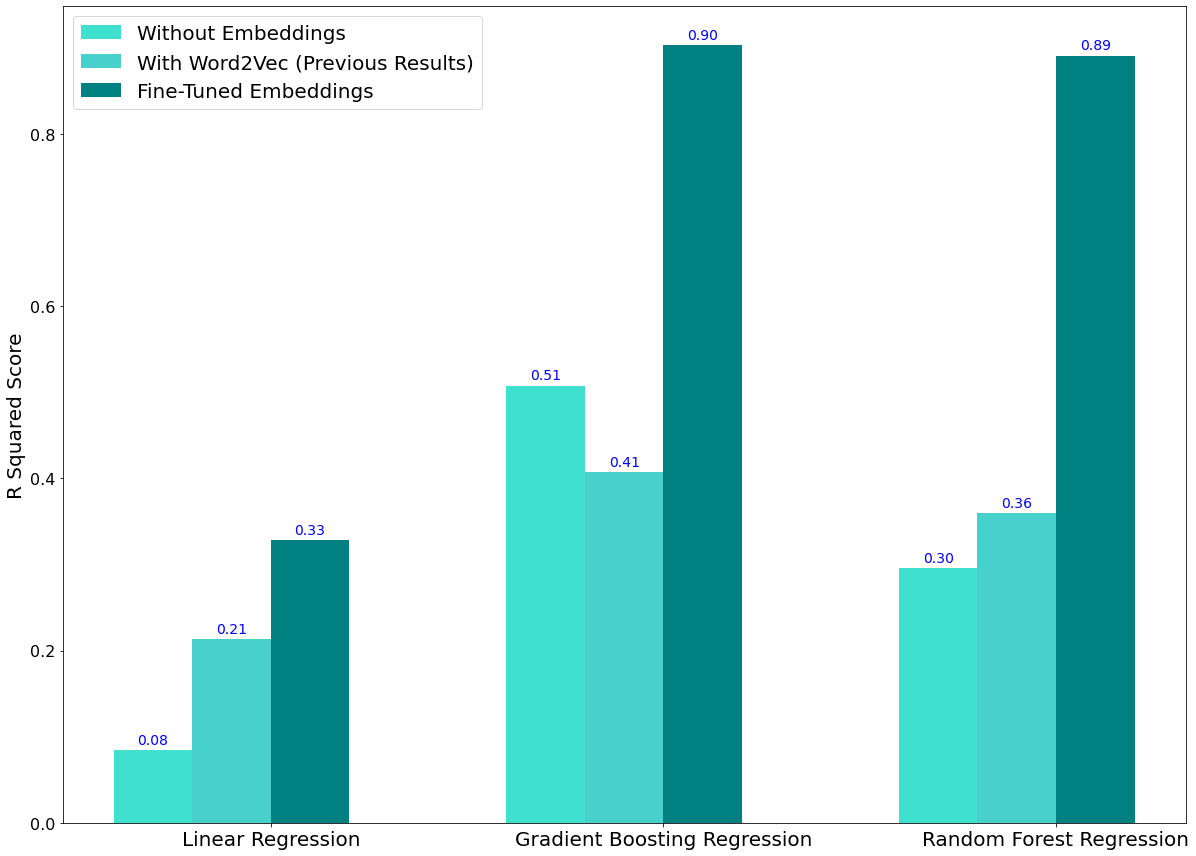

In [19]:
team = ['Linear Regression', 'Gradient Boosting Regression', 'Random Forest Regression']

# original results
r2_original_lr  = r2_score(Y_original_test, predictions_lr)
r2_original_gb  = r2_score(Y_original_test, predictions_gb)
r2_original_rf  = r2_score(Y_original_test, predictions_rf)
ori_res = [r2_original_lr, r2_original_gb, r2_original_rf]

# fine tuning word2vec result
r2_2vec_lr = r2_score(Y_2vec_test, predictions_lr_2vec)
r2_2vec_gb = r2_score(Y_2vec_test, predictions_gb_2vec)
r2_2vec_rf = r2_score(Y_2vec_test, predictions_rf_2vec)
res_2vec = [r2_2vec_lr, r2_2vec_gb, r2_2vec_rf]

# prevoius model result
r2_previous_lr = r2_score(Y_previous_test, predictions_lr_previous)
r2_previous_gb = r2_score(Y_previous_test, predictions_gb_previous)
r2_previous_rf = r2_score(Y_previous_test, predictions_rf_previous)
previous_res = [r2_previous_lr, r2_previous_gb, r2_previous_rf]

# fasttext model result
r2_ft_lr = r2_score(Y_ft_test, predictions_lr_ft)
r2_ft_gb = r2_score(Y_ft_test, predictions_gb_ft)
r2_ft_rf = r2_score(Y_ft_test, predictions_rf_ft)
ft_res = [r2_ft_lr, r2_ft_gb, r2_ft_rf]


all_res = [ori_res, previous_res, res_2vec, ft_res]


x_axis = np.arange(len(team))
r = np.arange(12)
plt.figure(figsize=(17,12))
result_without_2vec = plt.bar(x_axis -0.30, ori_res, width=0.2, label = 'Without Embeddings', color='turquoise')
result_previous_embeddings = plt.bar(x_axis -0.1, previous_res, width=0.2, label = 'With Word2Vec (Previous Results)', color='mediumturquoise')
result_ajusted_embeddings = plt.bar(x_axis +0.1, res_2vec, width=0.2, label = 'Fine-Tuned Embeddings', color='teal')
# result_fasttext_embeddings = plt.bar(x_axis +0.3, ft_res, width=0.2, label = 'FastText Embeddings', color='teal')


# Xticks
plt.xticks(x_axis,team, fontsize=20)

# addlabels
plt.bar_label(result_without_2vec, padding=3, fmt='%.2f', color='b', fontsize=14)
plt.bar_label(result_previous_embeddings, padding=3, fmt='%.2f', color='b', fontsize=14)
plt.bar_label(result_ajusted_embeddings, padding=3, fmt='%.2f', color='b', fontsize=14)
# plt.bar_label(result_fasttext_embeddings, padding=3, fmt='%.2f', color='b', fontsize=14)

# setting x and y axis labels
plt.yticks(fontsize=16)
plt.ylabel("R Squared Score", fontsize=20)
# plt.title("Performance Comparison of Predicting the Market Capital of SP Companies", fontsize=25)
# Add legend

plt.legend(fontsize=20)

# Display
# plt.subplots_adjust(bottom = 0.15)
plt.tight_layout()
plt.savefig('market cap prediction.jpg',bbox_inches='tight', dpi=250)
plt.show()
plt.close()

### R2 as metrics

In [20]:
# a graph that want to find the ordering r2_score_2vec > r2_score_pre > r2_score_ori (blue > green > red)
# that means our model is the best, next is the previous model, last is the original one

model_LR = LinearRegression()
corrected_order_LR = {}

for i in range(0, 60):
    X_original_train, X_original_test, Y_original_train, Y_original_test = train_test_split(X_original, Y_original, test_size=0.2, random_state=i)
    X_2vec_train, X_2vec_test, Y_2vec_train, Y_2vec_test = train_test_split(X_2vec, Y_2vec, test_size=0.2, random_state=i)
    X_previous_train, X_previous_test, Y_previous_train, Y_previous_test = train_test_split(X_previous, Y_previous, test_size=0.2, random_state=i)
    X_ft_train, X_ft_test, Y_ft_train, Y_ft_test = train_test_split(X_ft, Y_ft, test_size=0.2, random_state=i)

    # Linear regression
    LR_original = model_LR.fit(X_original_train, Y_original_train)
    predictions_lr = LR_original.predict(X_original_test)
    
    LR_2vec = model_LR.fit(X_2vec_train, Y_2vec_train)
    predictions_lr_2vec = LR_2vec.predict(X_2vec_test)
    
    LR_previous = model_LR.fit(X_previous_train, Y_previous_train)
    predictions_lr_previous = LR_previous.predict(X_previous_test)
    
    LR_ft = model_LR.fit(X_ft_train, Y_ft_train)
    predictions_lr_ft = LR_ft.predict(X_ft_test)

    if r2_score(Y_original_test, predictions_lr) > 0:
        if r2_score(Y_ft_test, predictions_lr_ft) > r2_score(Y_2vec_test, predictions_lr_2vec):
            if r2_score(Y_2vec_test, predictions_lr_2vec) > r2_score(Y_previous_test, predictions_lr_previous):
                if r2_score(Y_previous_test, predictions_lr_previous) > r2_score(Y_original_test, predictions_lr):
                    corrected_order_LR[i] = r2_score(Y_2vec_test, predictions_lr_2vec)

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site

In [21]:
model_gb = GradientBoostingRegressor()
corrected_order_GB = {}
for i in range(0, 60):
    X_original_train, X_original_test, Y_original_train, Y_original_test = train_test_split(X_original, Y_original, test_size=0.2, random_state=i)
    X_2vec_train, X_2vec_test, Y_2vec_train, Y_2vec_test = train_test_split(X_2vec, Y_2vec, test_size=0.2, random_state=i)
    X_previous_train, X_previous_test, Y_previous_train, Y_previous_test = train_test_split(X_previous, Y_previous, test_size=0.2, random_state=i)    
    X_ft_train, X_ft_test, Y_ft_train, Y_ft_test = train_test_split(X_ft, Y_ft, test_size=0.2, random_state=i)
    
    # gradient boisting regressor
    GB_original = model_gb.fit(X_original_train, Y_original_train)
    predictions_gb = GB_original.predict(X_original_test)

    # the sp_company file with 12 dimensions
    GB_2vec = model_gb.fit(X_2vec_train, Y_2vec_train)
    predictions_gb_2vec = GB_2vec.predict(X_2vec_test)

    # the sp_company file with 4 dimensions
    GB_previous = model_gb.fit(X_previous_train, Y_previous_train)
    predictions_gb_previous = GB_previous.predict(X_previous_test)
    
    GB_ft = model_gb.fit(X_ft_train, Y_ft_train)
    predictions_gb_ft = GB_ft.predict(X_ft_test)

    if r2_score(Y_original_test, predictions_gb) > 0:
        if r2_score(Y_ft_test, predictions_gb_ft) > r2_score(Y_2vec_test, predictions_gb_2vec):
            if r2_score(Y_2vec_test, predictions_gb_2vec) > r2_score(Y_previous_test, predictions_gb_previous):     
                if r2_score(Y_previous_test, predictions_gb_previous) > r2_score(Y_original_test, predictions_gb):
                    corrected_order_GB[i] = r2_score(Y_2vec_test, predictions_gb_2vec)

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.wa

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

In [22]:
model_rf = RandomForestRegressor()
corrected_order_RF = {}

for i in range(0, 60):
    X_original_train, X_original_test, Y_original_train, Y_original_test = train_test_split(X_original, Y_original, test_size=0.2, random_state=i)
    X_2vec_train, X_2vec_test, Y_2vec_train, Y_2vec_test = train_test_split(X_2vec, Y_2vec, test_size=0.2, random_state=i)
    X_previous_train, X_previous_test, Y_previous_train, Y_previous_test = train_test_split(X_previous, Y_previous, test_size=0.2, random_state=i)
    X_ft_train, X_ft_test, Y_ft_train, Y_ft_test = train_test_split(X_ft, Y_ft, test_size=0.2, random_state=i)
    
    # random forest regressor
    RF_original = model_rf.fit(X_original_train, Y_original_train)
    predictions_rf = RF_original.predict(X_original_test)

    # the sp_company file with 12 dimensions
    RF_2vec = model_rf.fit(X_2vec_train, Y_2vec_train)
    predictions_rf_2vec = RF_2vec.predict(X_2vec_test)

    # the sp_company file with 4 dimensions
    RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
    predictions_rf_previous = RF_previous.predict(X_previous_test)

    RF_ft = model_gb.fit(X_ft_train, Y_ft_train)
    predictions_rf_ft = RF_ft.predict(X_ft_test)

    if r2_score(Y_original_test, predictions_rf) > 0:
        if r2_score(Y_ft_test, predictions_rf_ft) > r2_score(Y_2vec_test, predictions_rf_2vec):
            if r2_score(Y_2vec_test, predictions_rf_2vec) > r2_score(Y_previous_test, predictions_rf_previous):     
                if r2_score(Y_previous_test, predictions_rf_previous) > r2_score(Y_original_test, predictions_rf):
                    corrected_order_RF[i] = r2_score(Y_2vec_test, predictions_rf_2vec)

C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_original = model_rf.fit(X_original_train, Y_original_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_2vec = model_rf.fit(X_2vec_train, Y_2vec_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An 

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Local\Temp/ipykernel_19188/580178888.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jerry\envs\nlp\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

In [23]:
corrected_order_LR

{}

In [24]:
corrected_order_GB

{4: 0.44926620648405335,
 5: 0.7301476076798226,
 14: 0.41530642869758094,
 21: 0.17360114819232453,
 29: 0.7022925531120927,
 53: 0.2965931790196993,
 56: 0.7740070579877301}

In [25]:
corrected_order_RF

{10: 0.8940551486790277, 13: 0.4969964274162716, 29: 0.6351777420519592}

### MAE as metrics

In [25]:
# MAE as metrics
# corrected_order_LR_mae = []

# for i in range(0, 60):
#     X_original_train, X_original_test, Y_original_train, Y_original_test = train_test_split(X_original, Y_original, test_size=0.3, random_state=i)
#     X_2vec_train, X_2vec_test, Y_2vec_train, Y_2vec_test = train_test_split(X_2vec, Y_2vec, test_size=0.3, random_state=i)
#     X_previous_train, X_previous_test, Y_previous_train, Y_previous_test = train_test_split(X_previous, Y_previous, test_size=0.3, random_state=i)

#     # Linear regression
#     LR_original = model_LR.fit(X_original_train, Y_original_train)
#     predictions_lr = LR_original.predict(X_original_test)
    
#     LR_2vec = model_LR.fit(X_2vec_train, Y_2vec_train)
#     predictions_lr_2vec = LR_2vec.predict(X_2vec_test)
    
#     LR_previous = model_LR.fit(X_previous_train, Y_previous_train)
#     predictions_lr_previous = LR_previous.predict(X_previous_test)
    
#     if mean_absolute_error(Y_original_test, predictions_lr) > 0:
        
#         if mean_absolute_error(Y_2vec_test, predictions_lr_2vec) < mean_absolute_error(Y_previous_test, predictions_lr_previous):
#             if mean_absolute_error(Y_previous_test, predictions_lr_previous) < mean_absolute_error(Y_original_test, predictions_lr):
#                 corrected_order_LR_mae.append(i)

In [26]:
# MAE as metrics
corrected_order_GB_mae = []
# for i in range(0, 60):
#     X_original_train, X_original_test, Y_original_train, Y_original_test = train_test_split(X_original, Y_original, test_size=0.3, random_state=i)
#     X_2vec_train, X_2vec_test, Y_2vec_train, Y_2vec_test = train_test_split(X_2vec, Y_2vec, test_size=0.3, random_state=i)
#     X_previous_train, X_previous_test, Y_previous_train, Y_previous_test = train_test_split(X_previous, Y_previous, test_size=0.3, random_state=i)    
    
#     # gradient boisting regressor
#     GB_original = model_gb.fit(X_original_train, Y_original_train)
#     predictions_gb = GB_original.predict(X_original_test)

#     # the sp_company file with 12 dimensions
#     GB_2vec = model_gb.fit(X_2vec_train, Y_2vec_train)
#     predictions_gb_2vec = GB_2vec.predict(X_2vec_test)

#     # the sp_company file with 4 dimensions
#     GB_previous = model_gb.fit(X_previous_train, Y_previous_train)
#     predictions_gb_previous = GB_previous.predict(X_previous_test)
    
#     if mean_absolute_error(Y_original_test, predictions_gb) > 0:
#         if mean_absolute_error(Y_2vec_test, predictions_gb_2vec) < mean_absolute_error(Y_previous_test, predictions_gb_previous):
#             if mean_absolute_error(Y_previous_test, predictions_gb_previous) < mean_absolute_error(Y_original_test, predictions_gb):
#                 corrected_order_GB_mae.append(i)

In [27]:
# MAE as metrics
# corrected_order_RF_mae = []

# for i in range(0, 60):
#     X_original_train, X_original_test, Y_original_train, Y_original_test = train_test_split(X_original, Y_original, test_size=0.3, random_state=i)
#     X_2vec_train, X_2vec_test, Y_2vec_train, Y_2vec_test = train_test_split(X_2vec, Y_2vec, test_size=0.3, random_state=i)
#     X_previous_train, X_previous_test, Y_previous_train, Y_previous_test = train_test_split(X_previous, Y_previous, test_size=0.3, random_state=i)

#     # random forest regressor
#     RF_original = model_rf.fit(X_original_train, Y_original_train)
#     predictions_rf = RF_original.predict(X_original_test)

#     # the sp_company file with 12 dimensions
#     RF_2vec = model_rf.fit(X_2vec_train, Y_2vec_train)
#     predictions_rf_2vec = RF_2vec.predict(X_2vec_test)

#     # the sp_company file with 4 dimensions
#     RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
#     predictions_rf_previous = RF_previous.predict(X_previous_test)

#     if mean_absolute_error(Y_original_test, predictions_rf) > 0:
#         if mean_absolute_error(Y_2vec_test, predictions_rf_2vec) < mean_absolute_error(Y_previous_test, predictions_rf_previous):
#             if mean_absolute_error(Y_previous_test, predictions_rf_previous) < mean_absolute_error(Y_original_test, predictions_rf):
#                 corrected_order_RF_mae.append(i)

### RMSE as metrics

In [28]:
# RMSE as metrics
# corrected_order_LR_rmse = []

# for i in range(0, 60):
#     X_original_train, X_original_test, Y_original_train, Y_original_test = train_test_split(X_original, Y_original, test_size=0.3, random_state=i)
#     X_2vec_train, X_2vec_test, Y_2vec_train, Y_2vec_test = train_test_split(X_2vec, Y_2vec, test_size=0.3, random_state=i)
#     X_previous_train, X_previous_test, Y_previous_train, Y_previous_test = train_test_split(X_previous, Y_previous, test_size=0.3, random_state=i)

#     # Linear regression
#     LR_original = model_LR.fit(X_original_train, Y_original_train)
#     predictions_lr = LR_original.predict(X_original_test)
    
#     LR_2vec = model_LR.fit(X_2vec_train, Y_2vec_train)
#     predictions_lr_2vec = LR_2vec.predict(X_2vec_test)
    
#     LR_previous = model_LR.fit(X_previous_train, Y_previous_train)
#     predictions_lr_previous = LR_previous.predict(X_previous_test)
    
#     if mean_squared_error(Y_original_test, predictions_lr, squared=False) > 0:
        
#         if mean_squared_error(Y_2vec_test, predictions_lr_2vec, squared=False) < mean_squared_error(Y_previous_test, predictions_lr_previous, squared=False):
#             if mean_squared_error(Y_previous_test, predictions_lr_previous, squared=False) < mean_squared_error(Y_original_test, predictions_lr, squared=False):
#                 corrected_order_LR_rmse.append(i)

In [29]:
# RMSE as metrics
# corrected_order_GB_rmse = []
# for i in range(0, 60):
#     X_original_train, X_original_test, Y_original_train, Y_original_test = train_test_split(X_original, Y_original, test_size=0.3, random_state=i)
#     X_2vec_train, X_2vec_test, Y_2vec_train, Y_2vec_test = train_test_split(X_2vec, Y_2vec, test_size=0.3, random_state=i)
#     X_previous_train, X_previous_test, Y_previous_train, Y_previous_test = train_test_split(X_previous, Y_previous, test_size=0.3, random_state=i)    
    
#     # gradient boisting regressor
#     GB_original = model_gb.fit(X_original_train, Y_original_train)
#     predictions_gb = GB_original.predict(X_original_test)

#     # the sp_company file with 12 dimensions
#     GB_2vec = model_gb.fit(X_2vec_train, Y_2vec_train)
#     predictions_gb_2vec = GB_2vec.predict(X_2vec_test)

#     # the sp_company file with 4 dimensions
#     GB_previous = model_gb.fit(X_previous_train, Y_previous_train)
#     predictions_gb_previous = GB_previous.predict(X_previous_test)
    
#     if mean_squared_error(Y_original_test, predictions_gb, squared=False) > 0:
#         if mean_squared_error(Y_2vec_test, predictions_gb_2vec, squared=False) < mean_squared_error(Y_previous_test, predictions_gb_previous, squared=False):
#             if mean_squared_error(Y_previous_test, predictions_gb_previous, squared=False) < mean_squared_error(Y_original_test, predictions_gb, squared=False):
#                 corrected_order_GB_rmse.append(i)

In [30]:
# RMSE as metrics
# corrected_order_RF_rmse = []

# for i in range(0, 60):
#     X_original_train, X_original_test, Y_original_train, Y_original_test = train_test_split(X_original, Y_original, test_size=0.3, random_state=i)
#     X_2vec_train, X_2vec_test, Y_2vec_train, Y_2vec_test = train_test_split(X_2vec, Y_2vec, test_size=0.3, random_state=i)
#     X_previous_train, X_previous_test, Y_previous_train, Y_previous_test = train_test_split(X_previous, Y_previous, test_size=0.3, random_state=i)

#     # random forest regressor
#     RF_original = model_rf.fit(X_original_train, Y_original_train)
#     predictions_rf = RF_original.predict(X_original_test)

#     # the sp_company file with 12 dimensions
#     RF_2vec = model_rf.fit(X_2vec_train, Y_2vec_train)
#     predictions_rf_2vec = RF_2vec.predict(X_2vec_test)

#     # the sp_company file with 4 dimensions
#     RF_previous = model_rf.fit(X_previous_train, Y_previous_train)
#     predictions_rf_previous = RF_previous.predict(X_previous_test)

#     if mean_squared_error(Y_original_test, predictions_rf, squared=False) > 0:
#         if mean_squared_error(Y_2vec_test, predictions_rf_2vec, squared=False) < mean_squared_error(Y_previous_test, predictions_rf_previous, squared=False):
#             if mean_squared_error(Y_previous_test, predictions_rf_previous, squared=False) < mean_squared_error(Y_original_test, predictions_rf, squared=False):
#                 corrected_order_RF_rmse.append(i)